# Задание к лабораторной работе №8 по машинному обучению

линейная регрессия, полиномиаьная регрессия, регуляризация, логистическая регрессия 

Датасет для задачи регрессии - load_diabetes

Датасет для задачи классификации - load_breast_cancer

In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes, load_breast_cancer
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, LogisticRegressionCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, roc_auc_score,roc_curve

1. Регрессия. Применить линейную (и модели с регуляризацией) и полиномиальную регрессию к датасету load_diabetes. Вывести метрики R2, MSE, MAE для двух моделей. Построить scatterplot predicted vs. true.

In [138]:
#загружаем данные о диабете, разделяет их на признаки и целевую переменную, 
#а затем делим данные на обучающую и тестовую выборки для последующего анализа или обучения модели.
data = load_diabetes()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
#cоздаем класс, конструктор и метод transform для дальнейшего удобства
class LinearFeatures:

    def __init__(self):
        pass

    def transform(self,X):
        return X

In [140]:
#создаем объект для генерации полиномиальных признаков (второго порядка) и объект класса LinearFeatures
pf = PolynomialFeatures(degree=2)
pf.fit(X_train)

lf = LinearFeatures()

In [141]:

# 1. Создаем и обучаем несколько моделей линейной регрессии (обычную, Ridge, Lasso, ElasticNet и полиномиальную).
# 2. Применяем соответствующие трансформации к данным (линейные или полиномиальные).
# 3. Делаем предсказания на тестовых данных.
# 4. Оцениваем качество каждой модели с помощью нескольких метрик и сохраняем результаты в словарях predictions и result.

result = {}
predictions = {}
lr = LinearRegression()
ridge = Ridge()
lasso = Lasso()
elastic = ElasticNet()
pr = LinearRegression()
for model, transformation, model_name in zip([lr,ridge,lasso,elastic,pr],[lf,lf,lf,lf,pf],['linear','ridge','lasso','elastic','polynomial']):
    model.fit(transformation.transform(X_train),y_train)
    y_pred = model.predict(transformation.transform(X_test))
    predictions[model_name] = y_pred
    for metric in [r2_score, mean_squared_error, mean_absolute_error]:
        result[(model_name,metric.__name__)] = [metric(y_test,y_pred)]

In [142]:
pd.DataFrame(result).stack() #делаем из датафрейма стек - он превращает столбцы в строки, создавая многоуровневый индекс.
# Это означает, что если у вас есть несколько метрик для каждой модели, они будут представлены в виде многоуровневого
# индекса, где первый уровень — это имя модели, а второй уровень — это имя метрики.

elastic        lasso       linear   polynomial  \
0 mean_absolute_error    63.935904    49.207901    41.919378    44.221396   
  mean_squared_error   5381.535094  3444.670825  2821.750981  3168.930444   
  r2_score                0.003107     0.361898     0.477290     0.412977   

                             ridge  
0 mean_absolute_error    45.463528  
  mean_squared_error   3112.966415  
  r2_score                0.423344

Linear Regression показала наименьшую среднюю абсолютную ошибку и наибольшую R^2 оценку, что свидетельствует о ее лучшей производительности по сравнению с остальными моделями. Самые худшие результаты Elastic Net и Polynomial Regression - самая высокая средняя абсолютная ошибка и низкая оценка R^2.

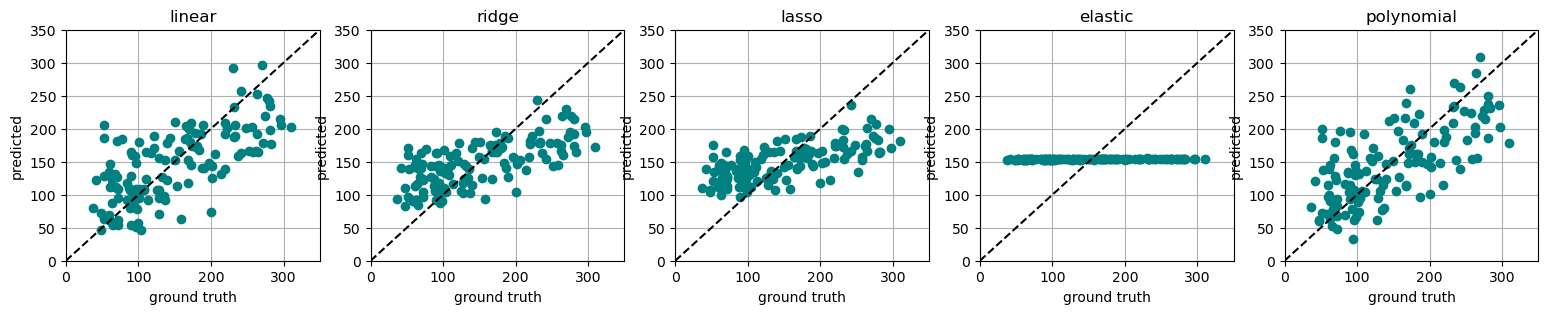

In [145]:
# визуализируем данные
fig, axs = plt.subplots(1,5,figsize=(19,3))
for model_name, ax in zip(['linear','ridge','lasso','elastic','polynomial'],axs):
    ax.plot(y_test,predictions[model_name],'o',color = 'teal')
    ax.plot(np.arange(350),np.arange(350),'--',color='black')
    ax.set_title(model_name)
    ax.set_xlabel('ground truth')
    ax.set_ylabel('predicted')
    ax.set_xlim(0,350)
    ax.set_ylim(0,350)
    ax.grid()

На графиках видно, что метод Elastic Net не подходит для решения данной задачи, остальные показывают приемлимые результаты

2. Классификация. Найти оптимальное значение параметра регуляризации $C$ с помощью LogisticRegressionCV – перебора параметров по сетке с последующей кросс-валидацией. Этот класс создан специально для логистической регрессии (для нее известны эффективные алгоритмы перебора параметров), для произвольной модели мы бы использовали GridSearchCV, RandomizedSearchCV. Построить график зависимости метрики ROC-AUC от параметра С.

In [58]:
data = load_breast_cancer()

X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [99]:
# Создаем модель логистической регрессии, которая будет автоматически подбирать оптимальный параметр регуляризации C 
# с помощью 10-кратной перекрестной проверки.  Обучаем модель с помощью ROC AUC
lrcv = LogisticRegressionCV(Cs=np.arange(0.1,2,0.1,dtype=np.float32),cv=10,scoring='roc_auc',max_iter=10000)
lrcv.fit(X_train,y_train)

LogisticRegressionCV(Cs=array([0.1       , 0.2       , 0.3       , 0.4       , 0.5       ,
       0.6       , 0.70000005, 0.8       , 0.90000004, 1.        ,
       1.1       , 1.2       , 1.3000001 , 1.4000001 , 1.5       ,
       1.6       , 1.7       , 1.8000001 , 1.9000001 ], dtype=float32),
                     cv=10, max_iter=10000, scoring='roc_auc')

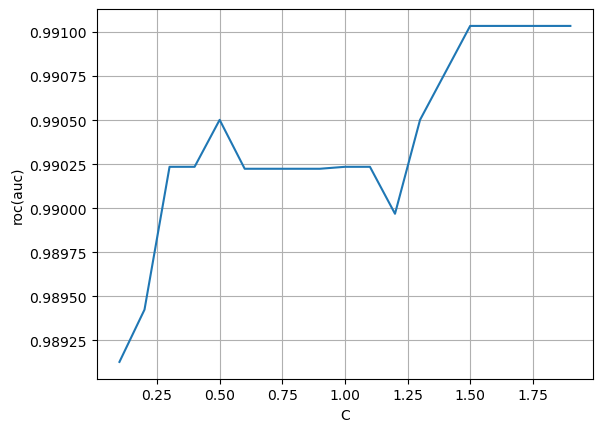

In [105]:
plt.plot(lrcv.Cs_,lrcv.scores_[1].mean(0))
plt.grid()
plt.xlabel('C')
plt.ylabel('roc(auc)')
plt.show()

На основе данного графика можно сделать вывод, что оптимальное значение параметра С для данной модели находится в диапазоне от 1 до 1.5.

In [104]:
print(f'Best C: {lrcv.C_[0]}')

Best C: 1.5


In [120]:
# оценим качество logistic regression на тестовой выборке
y_pred_proba = lrcv.predict_proba(X_test)[:,1]
roc_auc_score(y_test, y_pred_proba)

0.997501469723692

Получили достаточно высокую точность

In [130]:
# создаем интерактивную ROC-кривую с помощью библиотеки Plotly в Python.
fpr, tpr, trh = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

trace = go.Scatter(x=fpr, y=tpr, mode='lines', name='AUC = %0.5f' % auc,
                   line=dict(color='darkorange', width=2))
reference_line = go.Scatter(x=[0,1], y=[0,1], mode='lines', name='Reference Line',
                            line=dict(color='navy', width=2, dash='dash'))
fig = go.Figure(data=[trace, reference_line])
fig.update_layout(title='Interactive ROC Curve',
                  xaxis_title='False Positive Rate',
                  yaxis_title='True Positive Rate')
fig.show()

Данный график ROC демонстрирует высокое качество модели классификации. Она обладает высокой точностью и показывает значительное превосходство над случайным предсказанием.

3. Выбрать порог классификации для LogisticRegression на основе метрики

In [134]:
print(f'Лучшее значение tp_rate = {tpr.max()} достигается при пороге {trh[tpr.argmax()]}\nfp_rate при данном значении равно {fpr[tpr.argmax()]}')

Лучшее значение tp_rate = 1.0 достигается при пороге 0.060964359293834
fp_rate при данном значении равно 0.07936507936507936
